> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import os
import csv
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Define a function to convert xlsx files to csv
def csv_from_excel(file_to_convert):
    #open workbook with data to insert to csv
    workbook = xlrd.open_workbook(file_to_convert)
    
    #identify which sheet holds the data
    sheet = workbook.sheet_by_name('Data')
    
    #capture the filename as string
    file_to_convert_name = os.path.splitext(file_to_convert)[0]
    
    #print(file_to_convert_name)
    
    #open a new csv file and save it as the filename string.csv
    your_csv_file = open(file_to_convert_name + '.csv', 'w')
    
    #identify the file you want to write to
    wb_writer = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    #copy each row from the xlsx file to the csv file
    for rownum in range(sheet.nrows):
        wb_writer.writerow(sheet.row_values(rownum))

    your_csv_file.close()
    
#STEP1: Convert files you want to analyze from xlsx to csv into dataframes

# runs the csv_from_excel function:
csv_from_excel('Indicator_HDI.xlsx')
csv_from_excel('GDPpercapitaconstant2000US.xlsx')
csv_from_excel('indicator SP_URB_TOTL.xlsx')

# read csv file into df
hdi_labels = ['Country','1980','1990','2000','2005','2006','2007','2008','2009','2011']
hdi = pd.read_csv('Indicator_HDI.csv', header = 0, names = hdi_labels, index_col=0)
gdp = pd.read_csv('GDPpercapitaconstant2000US.csv', header = 0, index_col=0)
pop = pd.read_csv('indicator SP_URB_TOTL.csv', header = 0, index_col=0)

hdi.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
Country,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


In [3]:
gdp.head()

,1960.0,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Income per person (fixed 2000 US$),,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


In [4]:
pop.head()

,1960.0,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Urban population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,769308.0,8.149230e+05,8.585217e+05,9.039139e+05,9.512259e+05,1.000582e+06,1.058743e+06,1.119067e+06,1.182159e+06,1.248901e+06,...,5.795940e+06,6.036100e+06,6.285281e+06,6.543804e+06,6.812538e+06,7.091245e+06,7.380272e+06,7.679982e+06,7.990746e+06,8.316976e+06
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,494443.0,5.118028e+05,5.294389e+05,5.473767e+05,5.655718e+05,5.839829e+05,6.025122e+05,6.211798e+05,6.399645e+05,6.588531e+05,...,1.352278e+06,1.391143e+06,1.430918e+06,1.470488e+06,1.512255e+06,1.553491e+06,1.594351e+06,1.635262e+06,1.676545e+06,1.716842e+06
Algeria,3293999.0,3.515148e+06,3.739963e+06,3.973289e+06,4.220987e+06,4.488176e+06,4.649105e+06,4.826104e+06,5.017299e+06,5.219332e+06,...,1.985484e+07,2.052936e+07,2.122220e+07,2.193298e+07,2.262505e+07,2.333554e+07,2.406175e+07,2.479959e+07,2.554562e+07,2.621697e+07


The hdi table has a smaller range of dates and so I will need to clean the other tables to correspond with the same date range.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# STEP2: Clean up Dataframes
#### STEP2.2: Remove rows with ALL NaN
def remove_nan(df):
    df = df.dropna(axis=0, how='all', inplace = False)
    df.index.name = 'Country'
    return df

hdi=remove_nan(hdi)
gdp=remove_nan(gdp)
pop=remove_nan(pop)

#### STEP2.1: Insert hdi mean into remaining NaN  for hdi and gdp

hdi_mean = hdi.mean(axis=1)
for i, col in enumerate(hdi):
    hdi.iloc[:, i] = hdi.iloc[:, i].fillna(hdi_mean)

gdp_mean = gdp.mean(axis=1)
for i, col in enumerate(gdp):
    gdp.iloc[:, i] = gdp.iloc[:, i].fillna(gdp_mean)

pop_mean = pop.mean(axis=1)
for i, col in enumerate(pop):
    pop.iloc[:, i] = pop.iloc[:, i].fillna(pop_mean)

gdp.head()

,1960.0,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country,,,,,,,,,,,,,,,,,,,,,
Albania,1201.566009,1201.566009,1201.566009,1201.566009,1201.566009,1201.566009,1201.566009,1201.566009,1201.566009,1201.566009,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
Algeria,1280.384828,1085.414612,855.947986,1128.415780,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,1359.491003,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482
Andorra,17292.992981,17292.992981,17292.992981,17292.992981,17292.992981,17292.992981,17292.992981,17292.992981,17292.992981,17292.992981,...,19430.054781,19834.632624,20254.346287,20737.945117,21595.395482,21495.805083,21943.339898,17292.992981,17292.992981,17292.992981
Angola,383.529960,383.529960,383.529960,383.529960,383.529960,383.529960,383.529960,383.529960,383.529960,383.529960,...,329.565594,328.777995,353.231466,404.270302,473.136344,562.987685,622.566879,619.818580,623.245275,629.955306
Antigua and Barbuda,8806.493107,8806.493107,8806.493107,8806.493107,8806.493107,8806.493107,8806.493107,8806.493107,8806.493107,8806.493107,...,9753.308311,10241.684839,10599.284668,11102.932157,12452.282038,13495.127466,13352.168544,11645.634909,10614.794315,9977.957073


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What are the overall trends of Canada, USA, France, and China? 

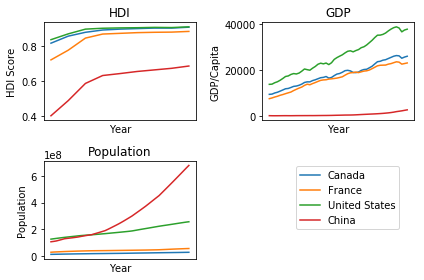

In [6]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# STEP3: Plot data to see overall trends

plt.subplot(2,2,1)
plt.title('HDI')
plt.xlabel('Year')
plt.ylabel('HDI Score')
plt.xticks([1980, 1990, 2000, 2005,2006,2007,2008,2009,2011])
hdi.loc['Canada'].plot()
hdi.loc['France'].plot()
hdi.loc['United States'].plot()
hdi.loc['China'].plot()

plt.subplot(2,2,2)
plt.title('GDP')
plt.xlabel('Year')
plt.ylabel('GDP/Capita')
plt.xticks([1980, 1990, 2000, 2005,2006,2007,2008,2009,2011])
gdp.loc['Canada'].plot()
gdp.loc['France'].plot()
gdp.loc['United States'].plot()
gdp.loc['China'].plot()

plt.subplot(2,2,3)
plt.title('Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks([1980, 1990, 2000, 2005,2006,2007,2008,2009,2011])
pop.loc['Canada'].plot()
pop.loc['France'].plot()
pop.loc['United States'].plot()
pop.loc['China'].plot()

plt.legend(('Canada', 'France', 'United States', 'China'),loc=9, bbox_to_anchor=(2, 1))
plt.tight_layout()

The HDI, GDP/Capita, and Population were simply line plotted to observe the overall trends over time for Canada, France, USA, and China.

HDI-Human development Index Canada, France, USA, and China exhitbit the same trend, but differ in range. The trend seem to increase during the same period and then reach a plateau.

GDP/Capita Canada, France, and USA exhibit the same upward trend. China seems to be plateauing. This is because the population is growing that the same rate as the GDP/capita, which is causing the GDP/Capita trend to remain fairly constant. These are countries I have considered living in, so it is interesting to see how these countries trend. Taking into account my living style and strive for human development, seems like Canada, USA, or France would be good options.

Text(0,0.5,'Occurance')

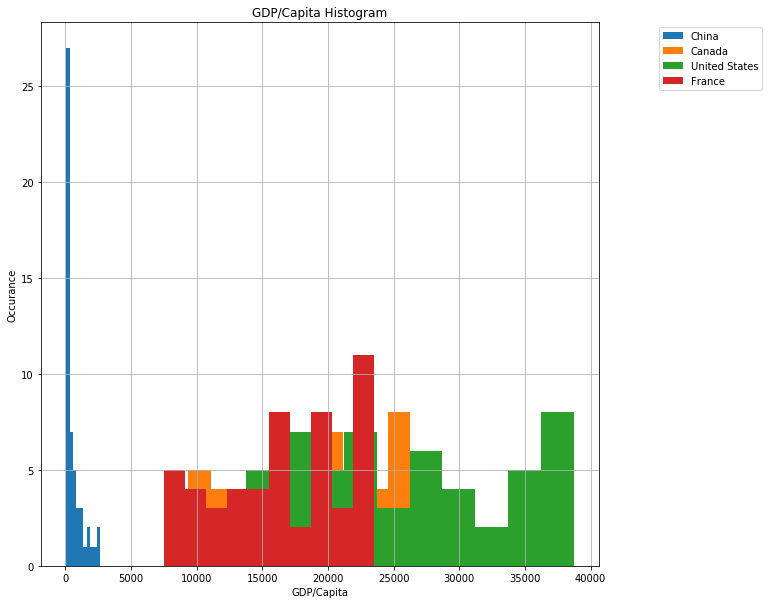

In [7]:
gdp.loc['China'].hist(figsize=(10,10))
gdp.loc['Canada'].hist(figsize=(10,10))
gdp.loc['United States'].hist(figsize=(10,10))
gdp.loc['France'].hist(figsize=(10,10))
plt.legend(('China', 'Canada', 'United States', 'France'),loc=9, bbox_to_anchor=(1.2, 1))
plt.title('GDP/Capita Histogram')
plt.xlabel('GDP/Capita')
plt.ylabel('Occurance')

Next, the GDP distributions for each of the observed coutnries were plotted as a histogram to see GDP/Capita distribution.

The gdp distribution for Canada, United States, and France are a similar bimodal distribution and have a similar width. China seems to have a normal and narrow distribution. This shows that Canada, United States, and France trend similarily, whereas China is just beginning to increase, after a long of being at lower gdp. 

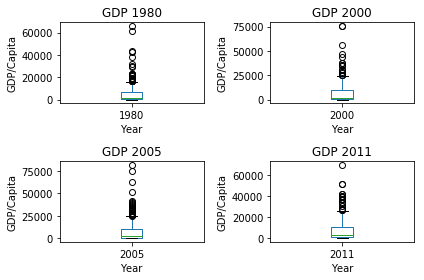

In [9]:
plt.subplot(221)
gdp['1980'].plot(kind='box');
plt.title('GDP 1980')
plt.ylabel('GDP/Capita')
plt.xlabel('Year')


plt.subplot(222)
gdp['2000'].plot(kind='box');
plt.title('GDP 2000')
plt.ylabel('GDP/Capita')
plt.xlabel('Year')

plt.subplot(223)
gdp['2005'].plot(kind='box');
plt.title('GDP 2005')
plt.ylabel('GDP/Capita')
plt.xlabel('Year')

plt.subplot(224)
gdp['2011'].plot(kind='box');
plt.title('GDP 2011')
plt.ylabel('GDP/Capita')
plt.xlabel('Year')

plt.tight_layout()

The gdp box plot shows that throughout the years most of the distribution stays the same and there are some outliers that fall above the maximum, which probably account for the richer countries. 

### Research Question 2:#What is the the relationship of GDP to HDI over time? 

In [9]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#Cleaning steps for address the second question
#STEP4: Consolidate common columns
column_list=['1980','1990','2000','2005','2006','2007','2008','2009','2011']
hdi = hdi[column_list]
gdp = gdp[column_list]
pop = pop[column_list]
hdi.head()




,1980,1990,2000,2005,2006,2007,2008,2009,2011
Country,,,,,,,,,
Afghanistan,0.198000,0.246000,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Albania,0.715875,0.656000,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454000,0.551000,0.624,0.667,0.673,0.680,0.686,0.691,0.698
Andorra,0.838000,0.838000,0.838,0.838,0.838,0.838,0.838,0.838,0.838
Angola,0.457429,0.457429,0.384,0.445,0.459,0.471,0.476,0.481,0.486


In [10]:
#gdp_div_hdi=gdp['2011']/hdi['2011']
print(gdp['2011'].head())

Country
Albania                 1965.707230
Algeria                 2255.225482
Andorra                17292.992981
Angola                   629.955306
Antigua and Barbuda     9977.957073
Name: 2011, dtype: float64


In [11]:
gdp.loc['Canada']

1980    16751.338778
1990    19561.879336
2000    23559.503690
2005    25437.651336
2006    25943.736020
2007    26229.743081
2008    26101.764071
2009    25069.869150
2011    25933.288335
Name: Canada, dtype: float64

In [12]:
hdi.loc['Canada']

1980    0.817
1990    0.857
2000    0.879
2005    0.892
2006    0.897
2007    0.900
2008    0.903
2009    0.903
2011    0.908
Name: Canada, dtype: float64

In [11]:
gdp_hdi_canada = [0,0,0,0,0,0,0,0]
gdp_hdi_france = [0,0,0,0,0,0,0,0]
gdp_hdi_us = [0,0,0,0,0,0,0,0]
gdp_hdi_china = [0,0,0,0,0,0,0,0]


for i, col in enumerate(gdp_hdi_canada):
    #print(i)
    #print(col)
    gdp_hdi_canada[i] = (gdp.loc['Canada'][i])/(hdi.loc['Canada'][i])
    #print(gdp_hdi_canada.loc[i])
    
for i, col in enumerate(gdp_hdi_france):
    #print(i)
    #print(col)
    gdp_hdi_france[i] = (gdp.loc['France'][i])/(hdi.loc['France'][i])
    #print(gdp_hdi_canada.loc[i])
    
for i, col in enumerate(gdp_hdi_us):
    #print(i)
    #print(col)
    gdp_hdi_us[i] = (gdp.loc['United States'][i])/(hdi.loc['United States'][i])
    #print(gdp_hdi_canada.loc[i])
    
for i, col in enumerate(gdp_hdi_china):
    #print(i)
    #print(col)
    gdp_hdi_china[i] = (gdp.loc['China'][i])/(hdi.loc['China'][i])
    #print(gdp_hdi_canada.loc[i])
    


#hdi.loc['Canada'][:]
#len(gdp_hdi_canada)

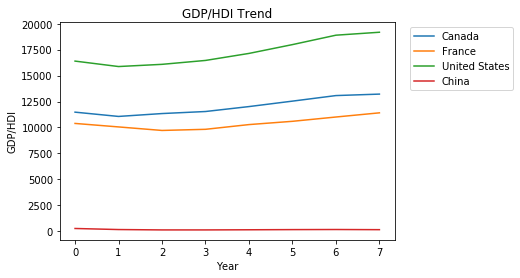

In [12]:
plt.plot(gdp_hdi_canada)
plt.plot(gdp_hdi_france)
plt.plot(gdp_hdi_us)
plt.plot(gdp_hdi_china)
plt.xlabel('Year')
plt.ylabel('GDP/HDI')
plt.title('GDP/HDI Trend')
#plt.xticks([1980, 1990, 2000, 2005,2006,2007,2008,2009,2011])
plt.legend(('Canada', 'France', 'United States', 'China'),loc=9, bbox_to_anchor=(1.2, 1))

A relationship that is interesting to me is whether GDP and HDI have an effect on each other and whether there is an optimal GDP value for an optimal HDI value.

GDP per Capita/HDId relation for Canada, France, and USA seem to exhibit a parabolic relationship. These countries then maximis between year 3-5. This tell us that a ratio of GDP/HDI =~ 40 000 is optimal for USA. The country produces the best GDP at 40 000 times the HDI.

China is exhibiting an upward trend and has not reached a max ratio.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

HDI-Human development Index Canada, France, USA, and China exhitbit the same trend, but differ in range. The trend seem to increase during the same period and then reach a plateau.

GDP/Capita Canada, France, and USA exhibit the same upward trend. China seems to be plateauing. This is because the population is growing that the same rate as the GDP/capita, which is causing the GDP/Capita trend to remain fairly constant. These are countries I have considered living in, so it is interesting to see how these countries trend. Taking into account my living style and strive for human development, seems like Canada, USA, or France would be good options.

The gdp distribution for Canada, United States, and France are a similar bimodal distribution and have a similar width. China seems to have a normal and narrow distribution. This shows that Canada, United States, and France trend similarily, whereas China is just bieginging to increase, after a long of being at lower gdp. 

The gdp box plot shows that throughout the years most of the distribution stays the same and there are some outliers that fall above the maximum.

GDP per Capita/HDi relation for Canada, France, and USA seem to exhibit a parabolic relationship. These countries then maximis between year 3-5.

China is exhibiting an upward trend and has not reached a max ratio.

In conclusion, I asked two questions about overall hdi, gdp/capita, and population trends between Canada, France, USA, and China. These are countires I have conisered living in and was interested in these factors. HDI-Human development Index in Canada, France, USA, and China exhitbit the same trend, but differ in range. The trend seem to increase during the same period and then reach a plateau. GDP/Capita Canada, France, and USA exhibit the same upward trend. China seems to be plateauing. This is because the population is growing that the same rate as the GDP/capita, which is causing the GDP/Capita trend to remain fairly constant. My second question was regarding the relationship between GDP/capita and HDI. GDP per Capita/HDi relation for Canada, France, and USA seem to exhibit a parabolic relationship. These countries then maximis between year 3-5. China is exhibiting an upward trend and has not reached a max ratio.

The limitations are that I could not really evaluate the trends over time. I could only evaluate the trends through observations. A curve fit would need to be applied to each trend in order to get a quanitfiable relationship. Also the datasets end in 2011 and so we cant really observe the trends up to the current data.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])